In [1]:
import igraph as ig

In [2]:
file = "/home/imane/Desktop/PFE2020/file/Presentation examples/Example2.gml"

In [3]:
def createGraph(file):
    mainGraph = ig.Graph()
    mainGraph = ig.load(file)
    return mainGraph

def drawGraph(graph):
    graph.vs["vertex_size"] = 200
    graph.vs["label"] = graph.vs["name"]
    graph.vs["color"] = "teal"
    layout = graph.layout("large")
    return ig.plot(graph, layout = "circle", bbox = (400, 400), margin = 20, vertex_size = 30, vertex_label_color = "white")

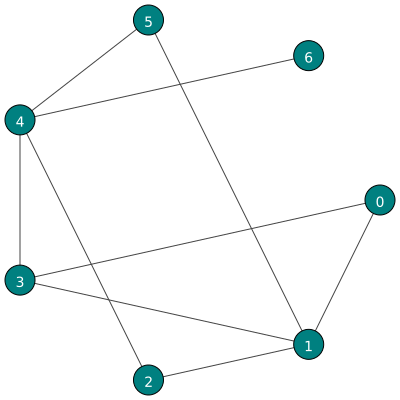

In [4]:
graph = createGraph(file)
drawGraph(graph)

In [5]:
print(graph.vcount())

7


<center> <h1>  STAGE ONE </h1>

<center> <h2>  Central Nodes Identification </h2>

</br>

In [6]:
def rank_nodes(graph):
    degrees_dict = {}
    keys = graph.vs["name"]
    for name in keys:
        degrees_dict[name] = graph.degree(name, loops=False)
    degrees_dict = {name: value for name, value in sorted(degrees_dict.items(), key=lambda item: item[1], reverse = True)}
    return degrees_dict

In [7]:
def sum_distances(graph):
    sum_dist= 0
    for i in range(graph.vcount()-1):
        for j in range(i+1, graph.vcount()):
            sum_dist = sum_dist + graph.shortest_paths_dijkstra(i, j)[0][0]
    return sum_dist

def avg_dist_D(graph):
    n = graph.vcount()
    return 2/(n*(n - 1)) * sum_distances(graph)

In [8]:
def check(L, D, key):   
    return(all(graph.shortest_paths_dijkstra(key, k)[0][0] >= D for k, v in L)) 
   
def central_nodes_set(graph, degrees_dict, avg_dist):
    cent_node_set = {}
    remaining_nodes = {}
    
    cent_node_set[list(degrees_dict.keys())[0]] = list(degrees_dict.values())[0]
    print(type(cent_node_set))
    degrees_dict.pop(list(degrees_dict.keys())[0], None)
    
    for key, value in list(degrees_dict.items()):

        if check(list(cent_node_set.items()), avg_dist, key):
            cent_node_set[key] = degrees_dict[key]
            del degrees_dict[key]
        else:
            remaining_nodes[key] = degrees_dict[key]
            del degrees_dict[key]
            
    return cent_node_set, remaining_nodes

In [9]:
def stage_one(graph):
    degrees_dict = rank_nodes(graph)
    D = avg_dist_D(graph)
    return central_nodes_set(graph, degrees_dict, D)

In [10]:
cns, remaining_nodes = stage_one(graph)
print(cns, remaining_nodes)

<class 'dict'>
{'1': 4, '4': 4} {'3': 3, '0': 2, '2': 2, '5': 2, '6': 1}


<center> <h1>  STAGE TWO </h1>

<center> <h2>  Label propagation </h2>

<br>

In [11]:
from collections import defaultdict
import random

In [12]:
def init_comm_set(cns, remaining_nodes):
    for key in cns:
        cns[key] = []
        
    remaining_nodes_list = []
    for key in remaining_nodes:
        remaining_nodes_list.append(key)
    return cns, remaining_nodes_list


cns, remaining_nodes_list = init_comm_set(cns, remaining_nodes)
print(cns)

{'1': [], '4': []}


In [13]:
def size_common_neighbors(l1, l2):
    l1_set = set(l1)
    intersection = l1_set.intersection(l2)
    return len(list(intersection))

def sim(u, v):
    numerator = 2 * size_common_neighbors(graph.neighbors(u), graph.neighbors(v))
    denominator = graph.degree(u) + graph.degree(v)
    return(numerator/denominator)

In [14]:
def max_similarity_neighbor(graph, central_node, remaining_nodes_list):
    similarity_values = {}
    max_value = 0
    
    neighbors_list = graph.neighbors(central_node)
    
    for rn in remaining_nodes_list:       
        if int(rn) in neighbors_list:             
            similarity_values[rn] = sim(central_node, rn)
    print("len1: ",  len(list(similarity_values.values())))
    if len(list(similarity_values.values())) > 0:       
        max_value = max(list(similarity_values.values()))
    else:
        return "False", "False"
    
    for key, value in list(similarity_values.items()):
        if value != max_value:
            del similarity_values[key]
    
    random_node = random.choice(list(similarity_values.keys()))
    
    return random_node, similarity_values[random_node]

In [15]:
def update_init_community(graph, cns, remaining_nodes_list):
    similar_neighbors = {}
    k = 0
    while len(remaining_nodes_list) > 0:
        max_val = 0

        for central_node in cns:

            rn, similarity = max_similarity_neighbor(graph, central_node, remaining_nodes_list) 
            if rn == "False":
                k = 1
                break
                
            similar_neighbors[central_node] = [rn, similarity]
            if max_val < similarity:
                max_val = similarity
                
        if k == 1:
            break
            
        i = 0 
        for key, value in list(similar_neighbors.items()):

            if value[1] != max_val:
                del similar_neighbors[key]
            i += 1

        random_n = random.choice(list(similar_neighbors.items()))
        cns[random_n[0]].append(random_n[1][0])
        remaining_nodes_list.remove(random_n[1][0])
    return cns

In [16]:
def Stage_two(cns, remaining_nodes):
    init_comm_dict, remaining_nodes_list = init_comm_set(cns, remaining_nodes)
    print(init_comm_dict)
    pre_community = update_init_community(graph, init_comm_dict, remaining_nodes_list)
    return pre_community

In [17]:
print(Stage_two(cns, remaining_nodes_list))

{'1': [], '4': []}
len1:  4
len1:  4
len1:  3
len1:  4
len1:  2
len1:  3
len1:  1
len1:  2
len1:  0
{'1': ['0', '3', '5'], '4': ['2']}


<b> Previous code: <b/>

In [ ]:
while len(degrees_dict) > 0:
    
    max_cn, max_n = max_similarity_node(graph, cns, degrees_dict)
    key = get_key(init_comm_dict, max_cn)
    print("")
    print("key: ",key)
    print("")
    init_comm_dict[key].append(max_n)
    print(init_comm_dict)
    print("")

    cns[max_n] = degrees_dict[max_n]
    print("")
    print("cns: ", cns)
    print("")
    del degrees_dict[max_n]


print(degrees_dict)
print(init_comm_dict)

def max_similarity_node(graph, cns, degrees_dict):
    max_cn = ""
    max_sim = -1
    for c in cns:
        similarity = 0
        for n in degrees_dict:
            neighbors = graph.neighbors(c)  
            print("")
            print("v: ", c, " u: ", n)
            print("")
            if int(n) in neighbors:
                print("")
                similarity = sim(c, n)
                print("similarity: ", similarity, " between ", c," and ", n)
                print("")
            if similarity > max_sim:
                max_cn = c
                max_n = n
                max_sim = similarity
    print("")
    print("max_cn: ", max_cn)
    print("")
    print("max_n: ", max_n)
    print("")
    print("max_sim: ", max_sim)
    print("")
    return max_cn, max_n

def get_key(init_comm_dict, max_cn):
    for k in init_comm_dict:
        for i in range(len(init_comm_dict[k])):
            if max_cn == init_comm_dict[k][i]:
                return k